In [191]:
from itertools import product
from operator import mul
from functools import reduce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
import re
from collections import Counter

## Data

In [159]:
#wikipedia articel about trump
with open('data/trump.txt', 'r') as file:
    text=file.readlines()

In [160]:
text=[item for item in text]
text="".join(text)
len(text)

90927

In [161]:
text

'Trump\'s ancestors originated from the German village of Kallstadt, Palatinate, on his father\'s side, and from the Outer Hebrides isles of Scotland on his mother\'s side. All his grandparents, and his mother, were born in Europe. His mother\'s grandfather was also christened "Donald".[2]\nTrump\'s paternal grandfather, Friedrich Trump, first emigrated to the United States in 1885 at the age of 16, and became a citizen in 1892. He amassed a fortune operating boom-town restaurants and boarding houses in the Seattle area and the Klondike region of Canada during the gold rush.[3] On a visit to Kallstadt, he met Elisabeth Christ and married her in 1902. The couple settled in New York permanently in 1905.[4] Frederick died from influenza during the 1918 pandemic.[5]\nDonald\'s father, Fred Trump, was born in 1905 in the Bronx. Fred started working with his mother in real estate when he was 15, shortly after his father\'s death. Their company, Elizabeth Trump and Son, was primarily active i

In [162]:
#stopwords list
with open("stopwords/english.txt", 'r') as file:
    stopwords=file.read().splitlines()

In [163]:
stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

## Tokenize, clean

In [164]:
def my_tokenizer(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens=[]
    for i in range(len(text)):
        helper=re.sub(r'(^https?:\/\/.*[\r\n]*)|(@[A-Za-z0-9]+)|([0-9])|(\w+:\/\/\S+)', '', 
                          text[i].lower(), flags=re.MULTILINE)
        tokens.append(tokenizer.tokenize(helper))
    return tokens



In [165]:
text_tokenized=my_tokenizer([text])

In [166]:
#remove short words
text_tokenized=[token for token in text_tokenized[0] if len(token)>2]

In [167]:
#remove stopwords
text_tokenized=[token for token in text_tokenized if token not in stopwords]

In [168]:
text_tokenized

['trump',
 'ancestors',
 'originated',
 'german',
 'village',
 'kallstadt',
 'palatinate',
 'father',
 'side',
 'outer',
 'hebrides',
 'isles',
 'scotland',
 'mother',
 'side',
 'grandparents',
 'mother',
 'born',
 'europe',
 'mother',
 'grandfather',
 'also',
 'christened',
 'donald',
 'trump',
 'paternal',
 'grandfather',
 'friedrich',
 'trump',
 'first',
 'emigrated',
 'united',
 'states',
 'age',
 'became',
 'citizen',
 'amassed',
 'fortune',
 'operating',
 'boom',
 'town',
 'restaurants',
 'boarding',
 'houses',
 'seattle',
 'area',
 'klondike',
 'region',
 'canada',
 'gold',
 'rush',
 'visit',
 'kallstadt',
 'met',
 'elisabeth',
 'christ',
 'married',
 'couple',
 'settled',
 'new',
 'york',
 'permanently',
 'frederick',
 'died',
 'influenza',
 'pandemic',
 'donald',
 'father',
 'fred',
 'trump',
 'born',
 'bronx',
 'fred',
 'started',
 'working',
 'mother',
 'real',
 'estate',
 'shortly',
 'father',
 'death',
 'company',
 'elizabeth',
 'trump',
 'son',
 'primarily',
 'active',
 '

In [169]:
#unique words
unique_words=list(set(text_tokenized))

In [170]:
count_coocur=[Counter() for word in unique_words]

In [171]:
len(unique_words)

3055

In [174]:
#count cooccurencies
for i in range(len(text_tokenized)):
    if i+1<len(text_tokenized):
        idx=unique_words.index(text_tokenized[i])
        count_coocur[idx][text_tokenized[i+1]]+=1

In [175]:
count_coocur

[Counter({'trump': 2}),
 Counter({'fixture': 1}),
 Counter({'contenders': 1,
          'contest': 1,
          'economic': 1,
          'environmental': 1,
          'legal': 1,
          'negotiations': 1}),
 Counter({'passion': 1}),
 Counter({'comey': 1,
          'congress': 1,
          'house': 1,
          'investigators': 1,
          'larry': 1,
          'nbc': 1,
          'news': 1,
          'wall': 1}),
 Counter({'comey': 5, 'dobson': 1, 'mattis': 2}),
 Counter({'president': 1}),
 Counter({'likely': 1, 'preparing': 1, 'presidency': 1, 'recording': 1}),
 Counter({'audience': 1}),
 Counter({'obama': 1}),
 Counter({'leader': 1}),
 Counter({'agreement': 1, 'change': 5}),
 Counter({'determine': 1}),
 Counter({'issue': 1, 'new': 1}),
 Counter({'larger': 1}),
 Counter({'fighting': 1, 'pro': 1, 'rein': 1}),
 Counter({'state': 2, 'terrorism': 2}),
 Counter({'one': 1}),
 Counter({'campaign': 1, 'keep': 1, 'mexico': 1, 'security': 1, 'wall': 1}),
 Counter({'amplify': 1}),
 Counter({'

In [176]:
df=pd.DataFrame(count_coocur)

In [181]:
df=df.fillna(0)

In [182]:
df

,abc,aberdeenshire,able,abolish,abolished,abolishing,abortion,abounds,absent,abused,...,yates,year,yearbook,years,yemen,york,youtube,zeckendorf,zelníčková,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
#remove to rare words
col_sum=df.sum(axis=1).tolist()

In [213]:
remove_idx=list(map(lambda x: x>=3, col_sum))

In [214]:
remove_idx

[False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 Fa

In [215]:
df2=df[remove_idx]

In [218]:
df2=df2.loc[:, remove_idx]

In [219]:
df2.shape

(711, 711)

## SVD word vectors

In [220]:
la=np.linalg

In [221]:
U, s, Vh = la.svd(df2, full_matrices=False)

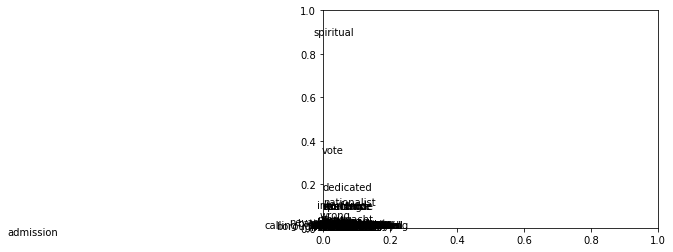

In [223]:
%matplotlib inline
for i in range(len(df2.columns)):
    plt.text(U[i,0], U[i,1], df2.columns[i])

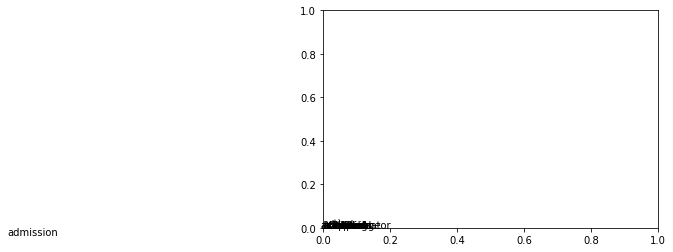

In [224]:
for i in range(20):
    plt.text(U[i,0], U[i,1], df2.columns[i])
